In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.patches as patches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import sys
import os

current_dir = os.getcwd() 
parent_dir = os.path.join(current_dir, '..', '..')
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from in2D.classifying.classes.simplex_tree_classifier import SimplexTreeClassifier
from in2D.classifying.classes.utilss.plane_equation import PlaneEquation

In [2]:
def make_meshgrid(x, y, h=.01):
    x_min, x_max = x.min() , x.max()
    y_min, y_max = y.min() , y.max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xy, **params):
    Z = clf.predict(xy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [3]:
N=1000
C=1000
gamma=0.01
D=2 #dimension
t=8 #polytope order

X = np.random.normal(0,1,(N,D))
ws= np.random.normal(0,1,(t,D))
ws = ws / (np.linalg.norm(ws,axis=1).reshape(-1,1))

u=np.random.uniform(0,1,(N,1))
X=X/(np.linalg.norm(X,axis=1).reshape(-1,1))*(u**(1/D))

y=np.ones(N)

for index in range(N):
    z = 1
    for w in ws :
        if((X[index].dot(w)- 0.5 - gamma) > 0):
            z = -1
        else :
            if ((X[index].dot(w) - 0.4 -gamma) > 0):
                z =0
    y[index]=z

X=(X[y!= 0]+ [1,1])/2
y=y[y!= 0]

print("Dataset created:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Classes: {np.unique(y)}")


Dataset created:
X shape: (842, 2)
y shape: (842,)
Classes: [-1.  1.]


Running for subdivision_levels k=1
(842, 4)
Running for subdivision_levels k=2
(842, 7)
Running for subdivision_levels k=3
(842, 16)
Running for subdivision_levels k=4
(842, 43)


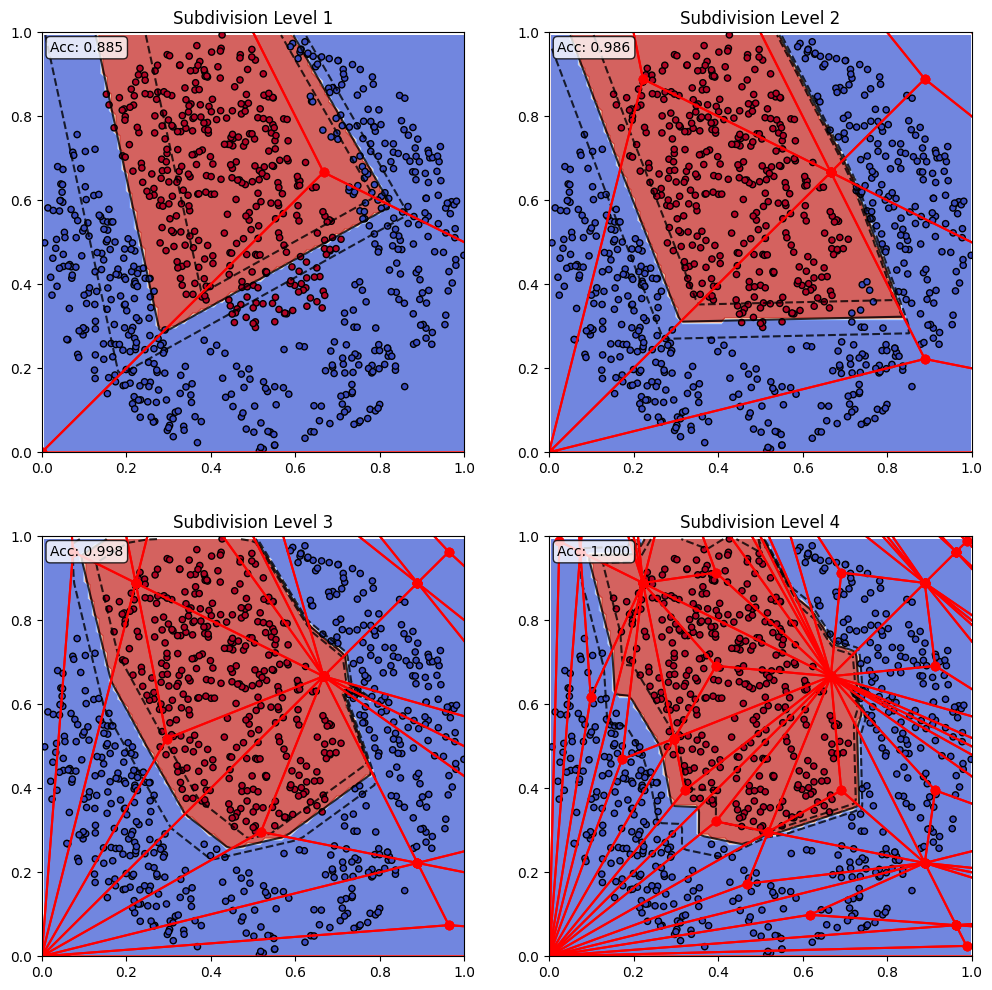

In [ ]:
fig, sub = plt.subplots(2, 2, figsize=(12, 12))
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

for k, title, ax in zip(range(1, 5), range(1, 5), sub.flatten()):
    print(f"Running for subdivision_levels k={k}")
    
    model = SimplexTreeClassifier(
        vertices=[(0, 0), (2, 0), (0, 2)], # Use a triangle that contains the [0,1]x[0,1] data space
        classifier=SVC(C=C),
        subdivision_levels=k,
    )
    
    model.fit(X, y)
    
    xy = model.transform(np.vstack([xx.ravel(), yy.ravel()]).T)

    plot_contours(ax, model.classifier, xx, yy, xy,
                 cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Subdivision Level {title}")

    if hasattr(model.classifier, "decision_function"):
        Z = model.classifier.decision_function(xy).reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
                    linestyles=['--', '-', '--'])

    boundaries = model.get_simplex_boundaries()
    for boundary in boundaries:
        if len(boundary) >= 3:
            closed_boundary = boundary + [boundary[0]]
            x_coords = [point[0] for point in closed_boundary]
            y_coords = [point[1] for point in closed_boundary]
            ax.plot(x_coords, y_coords, 'ro-')
            
    accuracy = model.classifier.score(model.transform(X), y)
    ax.text(0.02, 0.98, f'Acc: {accuracy:.3f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

### Redundent Planes Detection

In [5]:
MAX_SUBDIVISION = 8

CLEAR ADJACENCY VISUALIZATION TEST

Setup:
  Total leaf simplices: 9
  Testing simplex #8

Results:
  Test simplex has 3 adjacent simplices
  Test simplex vertices: ['(2.0,1.3)', '(2.0,4.0)', '(1.3,1.8)']


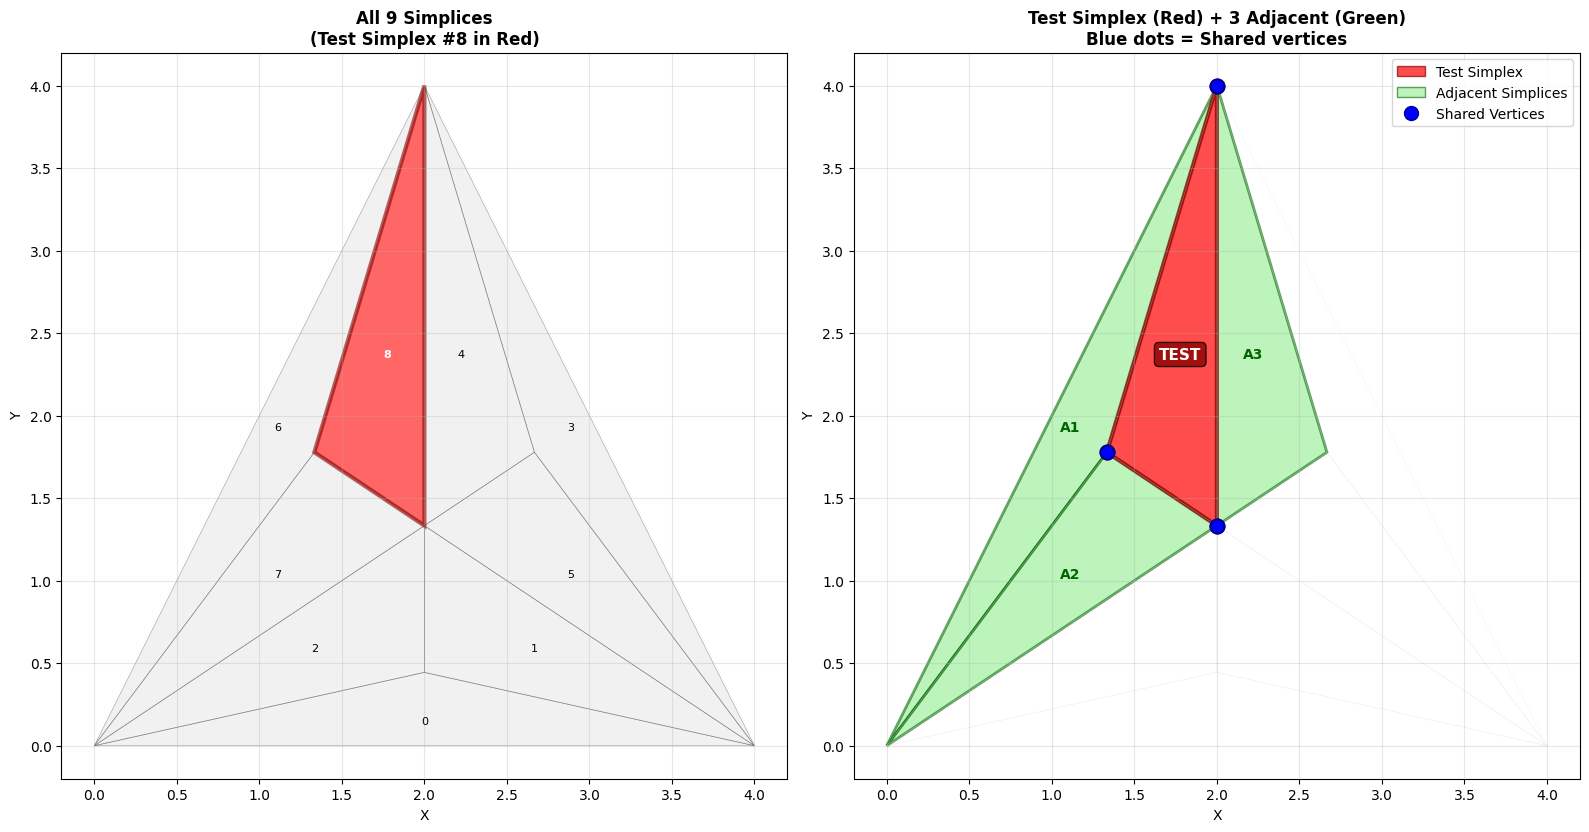


DETAILED ADJACENCY ANALYSIS

Simplex Properties:
  Dimension: 2D
  Maximum possible adjacent: 3
  Actually found: 3

Adjacent #1 (A1):
  Shared vertices: 2/2 needed for adjacency
  Tree depth: 2
  Vertices: ['(2.0,4.0)', '(0.0,0.0)', '(1.3,1.8)']
  ✓ Forms valid 1D face

Adjacent #2 (A2):
  Shared vertices: 2/2 needed for adjacency
  Tree depth: 2
  Vertices: ['(0.0,0.0)', '(2.0,1.3)', '(1.3,1.8)']
  ✓ Forms valid 1D face

Adjacent #3 (A3):
  Shared vertices: 2/2 needed for adjacency
  Tree depth: 2
  Vertices: ['(2.0,4.0)', '(2.0,1.3)', '(2.7,1.8)']
  ✓ Forms valid 1D face

Test complete! Blue dots show the shared vertices between simplices.


In [ ]:
print("="*60)
print("CLEAR ADJACENCY VISUALIZATION TEST")
print("="*60)

vertices = [(0, 0), (4, 0), (2, 4)]
subdivision_level = 2 
test_simplex_idx = 8  

classifier = SimplexTreeClassifier(vertices=vertices, subdivision_levels=subdivision_level)
all_leaves = classifier.tree.get_leaves()

print(f"\nSetup:")
print(f"  Total leaf simplices: {len(all_leaves)}")
print(f"  Testing simplex #{test_simplex_idx}")

test_simplex = all_leaves[test_simplex_idx % len(all_leaves)]  # Use modulo to avoid index errors
adjacent_simplices = classifier.find_adjacent_simplices(test_simplex.vertices)

print(f"\nResults:")
print(f"  Test simplex has {len(adjacent_simplices)} adjacent simplices")
print(f"  Test simplex vertices: {[f'({v[0]:.1f},{v[1]:.1f})' for v in test_simplex.vertices]}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.set_title(f'All {len(all_leaves)} Simplices\n(Test Simplex #{test_simplex_idx} in Red)', 
              fontsize=12, fontweight='bold')

for i, leaf in enumerate(all_leaves):
    vertices_array = np.array(leaf.vertices)
    vertices_closed = np.vstack([vertices_array, vertices_array[0]])
    
    if leaf == test_simplex:
        ax1.fill(vertices_array[:, 0], vertices_array[:, 1], 
                color='red', alpha=0.6, edgecolor='darkred', linewidth=3)
    else:
        ax1.fill(vertices_array[:, 0], vertices_array[:, 1], 
                color='lightgray', alpha=0.3, edgecolor='black', linewidth=0.5)
    
    centroid = np.mean(vertices_array, axis=0)
    color = 'white' if leaf == test_simplex else 'black'
    weight = 'bold' if leaf == test_simplex else 'normal'
    ax1.text(centroid[0], centroid[1], str(i), 
            ha='center', va='center', fontsize=8, color=color, fontweight=weight)

ax2.set_title(f'Test Simplex (Red) + {len(adjacent_simplices)} Adjacent (Green)\nBlue dots = Shared vertices', 
              fontsize=12, fontweight='bold')

for leaf in all_leaves:
    vertices_array = np.array(leaf.vertices)
    vertices_closed = np.vstack([vertices_array, vertices_array[0]])
    ax2.plot(vertices_closed[:, 0], vertices_closed[:, 1], 
            color='lightgray', linewidth=0.3, alpha=0.3)

adjacent_vertex_sets = [set(tuple(v) for v in adj) for adj in adjacent_simplices]

test_vertices_set = set(tuple(v) for v in test_simplex.vertices)
for adj_idx, adj_vertices in enumerate(adjacent_simplices):
    adj_array = np.array(adj_vertices)
    ax2.fill(adj_array[:, 0], adj_array[:, 1], 
            color='lightgreen', alpha=0.6, edgecolor='darkgreen', linewidth=2)
    
    centroid = np.mean(adj_array, axis=0)
    ax2.text(centroid[0], centroid[1], f'A{adj_idx+1}', 
            ha='center', va='center', fontsize=10, 
            color='darkgreen', fontweight='bold')
    
    adj_vertices_set = set(tuple(v) for v in adj_vertices)
    shared_vertices = test_vertices_set.intersection(adj_vertices_set)
    for vertex in shared_vertices:
        ax2.plot(vertex[0], vertex[1], 'o', 
                color='blue', markersize=10, 
                markeredgecolor='darkblue', markeredgewidth=1.5)

test_vertices_array = np.array(test_simplex.vertices)
ax2.fill(test_vertices_array[:, 0], test_vertices_array[:, 1], 
        color='red', alpha=0.7, edgecolor='darkred', linewidth=3)

test_centroid = np.mean(test_vertices_array, axis=0)
ax2.text(test_centroid[0], test_centroid[1], 'TEST', 
        ha='center', va='center', fontsize=11, color='white', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='darkred', alpha=0.8))

for ax in [ax1, ax2]:
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')


legend_elements = [
    Patch(facecolor='red', alpha=0.7, edgecolor='darkred', label='Test Simplex'),
    Patch(facecolor='lightgreen', alpha=0.6, edgecolor='darkgreen', label='Adjacent Simplices'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
           markersize=10, markeredgecolor='darkblue', label='Shared Vertices')
]
ax2.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DETAILED ADJACENCY ANALYSIS")
print("="*60)

dimension = len(test_simplex.vertices) - 1
print(f"\nSimplex Properties:")
print(f"  Dimension: {dimension}D")
print(f"  Maximum possible adjacent: {dimension + 1}")
print(f"  Actually found: {len(adjacent_simplices)}")

for i, adj_vertices in enumerate(adjacent_simplices):
    adj_set = set(tuple(v) for v in adj_vertices)
    shared = test_vertices_set.intersection(adj_set)
    
    adj_node = classifier._get_simplex_node(adj_vertices)
    
    print(f"\nAdjacent #{i+1} (A{i+1}):")
    print(f"  Shared vertices: {len(shared)}/{dimension} needed for adjacency")
    print(f"  Tree depth: {adj_node.depth if adj_node else 'unknown'}")
    print(f"  Vertices: {[f'({v[0]:.1f},{v[1]:.1f})' for v in adj_vertices]}")
    if len(shared) == dimension:
        print(f"  ✓ Forms valid {dimension-1}D face")

print("\n" + "="*60)
print("Test complete! Blue dots show the shared vertices between simplices.")
print("="*60)


In [7]:
cols = 2                       # plots per row
rows = int(np.ceil(MAX_SUBDIVISION / cols))

Running for subdivision_levels=1
(842, 4)
✅ OK (Target-Adjacent): dot=0.6407 at (0.50,0.11) & (0.67,0.44)
✅ OK (Target-Adjacent): dot=0.6381 at (0.50,0.11) & (0.33,0.44)
Found 0 problematic simplices
Running for subdivision_levels=2
(842, 7)
✅ OK (Target-Adjacent): dot=0.8105 at (0.67,0.15) & (0.33,0.15)
✅ OK (Target-Adjacent): dot=0.7527 at (0.67,0.15) & (0.72,0.26)
✅ OK (Adjacent-Adjacent): dot=0.2245 at (0.33,0.15) & (0.72,0.26)
✅ OK (Target-Adjacent): dot=0.9187 at (0.33,0.15) & (0.28,0.26)
✅ OK (Adjacent-Adjacent): dot=0.5133 at (0.67,0.15) & (0.28,0.26)
🔴 REDUNDANT PLANES (Target-Adjacent): dot=1.0000 at (0.72,0.48) & (0.56,0.59)
🔴 REDUNDANT PLANES (Target-Adjacent): dot=1.0000 at (0.72,0.48) & (0.72,0.26)
🔴 REDUNDANT PLANES (Adjacent-Adjacent): dot=1.0000 at (0.56,0.59) & (0.72,0.26)
✅ OK (Adjacent-Adjacent): dot=0.7527 at (0.72,0.48) & (0.67,0.15)
✅ OK (Adjacent-Adjacent): dot=0.7527 at (0.56,0.59) & (0.67,0.15)
✅ OK (Target-Adjacent): dot=0.7224 at (0.28,0.48) & (0.28,0.26)
✅ 

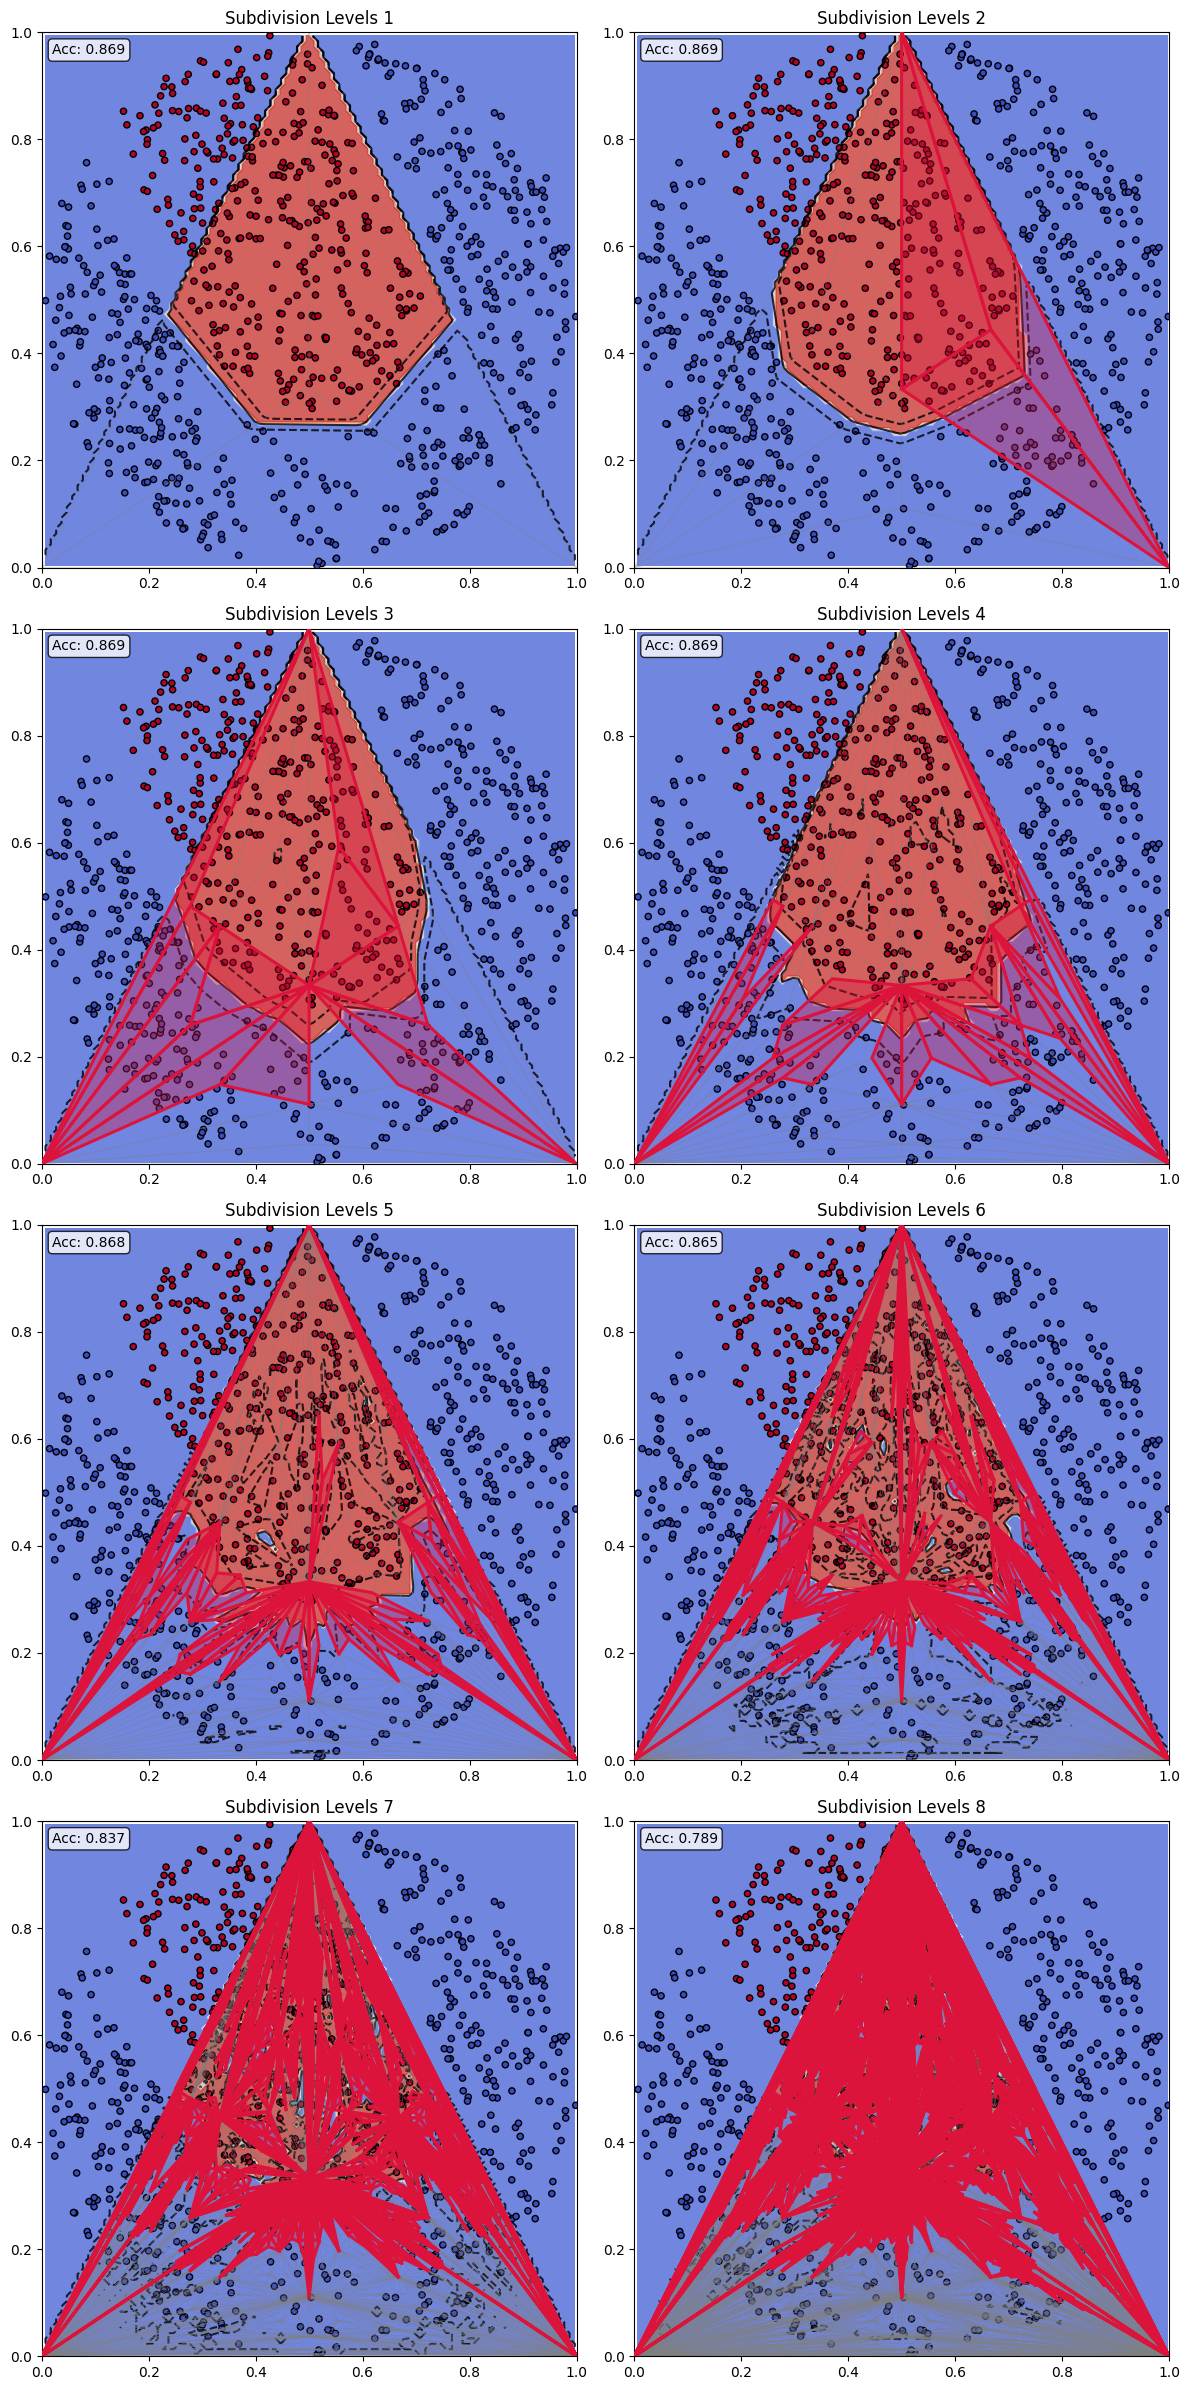

Last model with subdivision_levels 8 is ready for redundancy analysis


In [8]:
fig, sub = plt.subplots(rows, cols, figsize=(cols*6, rows*6))
xx, yy = make_meshgrid(X[:,0], X[:,1])

models = []

for k, ax in zip(range(1, MAX_SUBDIVISION+1), sub.flatten()):
    print(f"Running for subdivision_levels={k}")
    
    model = SimplexTreeClassifier(
        vertices=[(0, 0), (1, 0), (0.5, 1)],  # Triangle that matches data range [0,1]
        classifier=SVC(C=C),
        subdivision_levels=k,
    )
    
    model.fit(X, y)
    models.append(model)
    
    xy = model.transform(np.vstack([xx.ravel(), yy.ravel()]).T)

    plot_contours(ax, model.classifier, xx, yy, xy,
                 cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Subdivision Levels {k}")

    if hasattr(model.classifier, "decision_function"):
        Z = model.classifier.decision_function(xy).reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
                    linestyles=['--', '-', '--'])

    # Draw simplex boundaries
    boundaries = model.get_simplex_boundaries()
    for boundary in boundaries:
        if len(boundary) >= 3:
            closed_boundary = boundary + [boundary[0]]
            x_coords = [point[0] for point in closed_boundary]
            y_coords = [point[1] for point in closed_boundary]
            # Only draw if within plot bounds
            if all(0 <= x <= 1 for x in x_coords) and all(0 <= y <= 1 for y in y_coords):
                ax.plot(x_coords, y_coords, 'gray', linewidth=0.5, alpha=0.3)
    
    # ───────────────  Find non-convex simpli\ces  ───────────────
    if hasattr(model, '_processed_pairs_cache'):
        model._processed_pairs_cache.clear()
    
    offending = set()
    for leaf in model.leaf_simplexes:
        res = model.find_nonconvex_simplices(
            np.array(leaf.vertices), 
            angle_threshold=45
        )
        if res['target_simplex'] and res['nonconvex_pairs']:
            offending.add(tuple(map(tuple, leaf.vertices)))
            for p in res['nonconvex_pairs']:
                if 'target' in p and 'adjacent' in p:
                    offending.add(tuple(map(tuple, p['target']['vertices'])))
                    offending.add(tuple(map(tuple, p['adjacent']['vertices'])))
                elif 'simplex1' in p and 'simplex2' in p:
                    offending.add(tuple(map(tuple, p['simplex1']['vertices'])))
                    offending.add(tuple(map(tuple, p['simplex2']['vertices'])))

    for verts in offending:
        V = np.array(verts, dtype=float)
        # Only highlight if within plot bounds
        if np.all(V[:, 0] >= 0) and np.all(V[:, 0] <= 1) and np.all(V[:, 1] >= 0) and np.all(V[:, 1] <= 1):
            ax.fill(V[:,0], V[:,1], color='crimson', alpha=0.35, zorder=5)
            ax.plot(*np.vstack([V, V[0]]).T, color='crimson', lw=2.2, zorder=6)
    
    print(f"Found {len(offending)} problematic simplices")
    # ────────────────────────────────────────────────────────────────────────────
    
    accuracy = model.classifier.score(model.transform(X), y)
    ax.text(0.02, 0.98, f'Acc: {accuracy:.3f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hide unused subplots
for i in range(MAX_SUBDIVISION, rows * cols):
    sub.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

model = models[-1]
print(f"Last model with subdivision_levels {MAX_SUBDIVISION} is ready for redundancy analysis")